## Inversão da abertura

### O sinal é dado no rompimento da abertura do dia anterior

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
symbols = ['EURUSD','GBPUSD','USDCHF','USDJPY','USDCAD']

timeframe = 'D1'

df = pd.read_csv("data/"+ symbols[0]+ timeframe+ ".csv")
df = df[['Date','Open','High','Low','Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Return'] = (df['Close'] - df['Open']) *100000
df['Returnshift'] = df['Return'].shift(1)
df['Openshift'] = df['Open'].shift(1)


df

,Date,Open,High,Low,Close,Return,Returnshift,Openshift
0,2013-01-01,1.32036,1.32192,1.31977,1.32053,17.0,NaN,NaN
1,2013-01-02,1.32049,1.32992,1.31567,1.31888,-161.0,17.0,1.32036
2,2013-01-03,1.31889,1.31889,1.30246,1.30366,-1523.0,-161.0,1.32049
3,2013-01-04,1.30364,1.30884,1.29975,1.30677,313.0,-1523.0,1.31889
4,2013-01-07,1.30779,1.31276,1.30165,1.31252,473.0,313.0,1.30364
...,...,...,...,...,...,...,...,...
1810,2019-12-24,1.10887,1.10940,1.10692,1.10863,-24.0,128.0,1.10767
1811,2019-12-26,1.10875,1.11090,1.10824,1.10969,94.0,-24.0,1.10887
1812,2019-12-27,1.10975,1.11884,1.10943,1.11763,788.0,94.0,1.10875
1813,2019-12-30,1.11709,1.12208,1.11709,1.11991,282.0,788.0,1.10975


In [3]:
cond = [[(df['Returnshift'] < 0) & (df['High'] > df['Openshift'])], [(df['Returnshift'] >= 0) & (df['Low'] < df['Openshift'])]]

choice = [[df['Close'] - df['Openshift']], [df['Openshift'] - df['Close']]]

df['Bull'] = np.select(cond[1],choice[1], default=0) * 100000

df['Bear'] = np.select(cond[1],choice[1], default=0) * 100000

df['ResultCum'] = np.cumsum(df['Bull'] + df['Bear']) 

df.dropna(inplace=True)

df.head()

,Date,Open,High,Low,Close,Return,Returnshift,Openshift,Bull,Bear,ResultCum
1,2013-01-02,1.32049,1.32992,1.31567,1.31888,-161.0,17.0,1.32036,148.0,148.0,296.0
2,2013-01-03,1.31889,1.31889,1.30246,1.30366,-1523.0,-161.0,1.32049,0.0,0.0,296.0
3,2013-01-04,1.30364,1.30884,1.29975,1.30677,313.0,-1523.0,1.31889,0.0,0.0,296.0
4,2013-01-07,1.30779,1.31276,1.30165,1.31252,473.0,313.0,1.30364,-888.0,-888.0,-1480.0
5,2013-01-08,1.31253,1.31388,1.30569,1.30802,-451.0,473.0,1.30779,-23.0,-23.0,-1526.0


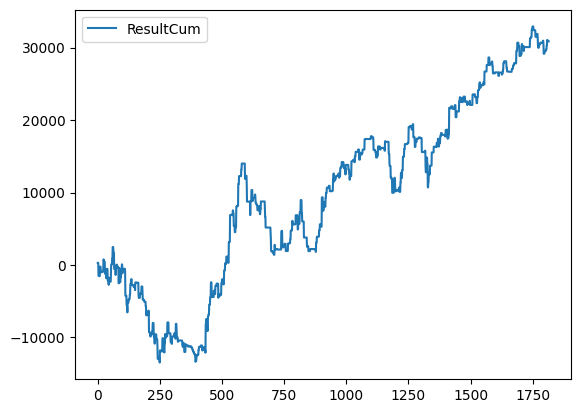

In [4]:
df.plot( y='ResultCum', kind = 'line')
plt.show()